In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
dataO = pd.read_csv('WESAD_Oversample.csv')

In [ ]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.000000,-32.0,44.0,30.520000,1.634132,35.810000,0.0
1,49.000000,-21.0,30.0,52.540000,1.614912,35.810000,0.0
2,52.000000,-22.0,27.0,94.310000,1.591848,35.810000,0.0
3,58.000000,-14.0,28.0,-38.860000,1.558534,35.810000,0.0
4,42.000000,-17.0,42.0,-89.820000,1.561096,35.810000,0.0
...,...,...,...,...,...,...,...
334631,52.000000,9.0,-35.0,46.729841,0.781364,35.346593,2.0
334632,61.000000,-14.0,8.0,-6.156408,4.576977,29.981845,2.0
334633,20.000000,61.0,1.0,13.437188,0.391537,34.030000,2.0
334634,24.000000,0.0,58.0,-23.339715,5.041989,34.802784,2.0


In [ ]:
dataO.describe()

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
count,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000,334636.000000
mean,17.145341,-1.632334,12.754596,0.512203,1.750976,32.918935,1.491310
std,45.297126,26.718691,28.676230,37.371348,1.940880,1.479666,1.119292
min,-111.222184,-79.000000,-72.569358,-187.970000,0.074584,28.990000,0.000000
25%,-31.000000,-17.000000,-6.000000,-12.704709,0.325196,31.930649,0.000000
50%,35.000000,-0.408712,12.928018,2.097088,0.820138,33.070000,1.000000
75%,57.000000,13.014758,36.000000,14.450000,2.869779,34.000000,2.000000
max,127.000000,76.506430,97.000000,187.964005,8.890202,35.970000,3.000000


In [ ]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334636 entries, 0 to 334635
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ACC_0   334636 non-null  float64
 1   ACC_1   334636 non-null  float64
 2   ACC_2   334636 non-null  float64
 3   BVP     334636 non-null  float64
 4   EDA     334636 non-null  float64
 5   TEMP    334636 non-null  float64
 6   labels  334636 non-null  float64
dtypes: float64(7)
memory usage: 17.9 MB


In [ ]:
dataO=dataO.drop(columns=['ACC_0'])
dataO=dataO.drop(columns=['ACC_2'])
dataO=dataO.drop(columns=['BVP'])

NORMALIZE

In [ ]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [ ]:
def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [ ]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [ ]:
X.describe()

,ACC_1,EDA,TEMP
count,334636.000000,334636.000000,334636.000000
mean,-0.473260,-4.771838,14.804993
std,1.000001,1.000001,1.000001
min,-3.368902,-5.635567,12.149704
25%,-1.048426,-5.506444,14.137081
50%,-0.427463,-5.251435,14.907087
75%,0.074938,-4.195396,15.535609
max,2.451243,-1.093487,16.866992


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
334631    2.0
334632    2.0
334633    2.0
334634    2.0
334635    2.0
Name: labels, Length: 334636, dtype: float64

In [ ]:
y.value_counts()

labels
1.0    85160
0.0    84289
3.0    83512
2.0    81675
Name: count, dtype: int64

In [ ]:
# testovacia sada 8/2
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trénovacia sada / validačná sada . 8/2
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

EVALVACIA

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.37129452546019603
Decision Tree Accuracy: 0.9751374611522831
Random Forest Accuracy: 0.9805462586660292
k-NN Accuracy: 0.973344489600765
SGD Accuracy: 0.29634831460674155
NB Accuracy: 0.3497340425531915
GBT Accuracy: 0.86391345923978
XGBoost Accuracy: 0.9690264164475257


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Accuracy: 0.6295272531675831
Best Model: Random Forest


TRÉNOVANIE

In [ ]:
from sklearn.linear_model import LogisticRegression

best_params = {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs', 'max_iter': 1000}
best_model = LogisticRegression(**best_params)

best_model.fit(X_train, y_train)

# Trénovacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Kontrola pretrénovania
if train_accuracy > val_accuracy:
    print("Overfitting")
else:
    print("No overfitting")


Training Accuracy: 0.3923030565641171
Validation Accuracy: 0.39616298354924023
No overfitting


LR

In [ ]:
best_params = {'C': 0.0031150633640573133, 'penalty': 'l2', 'solver': 'liblinear'}
best_model = LogisticRegression(**best_params)

# Krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.39643409 0.40103596 0.39157287 0.3927184  0.39172228 0.3936149
 0.39256898 0.39421257 0.39525849 0.38953083]
Mean CV Accuracy: 0.39386693677614626
Test Accuracy: 0.370412981114033


DT

In [ ]:
best_params = {'class_weight': None, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
best_model = DecisionTreeClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.9528363  0.95995617 0.95472657 0.96154996 0.95193744 0.95029385
 0.94865026 0.93246339 0.94715609 0.96000598]
Mean CV Accuracy: 0.9519576011739386
Test Accuracy: 0.9443879990437485


RF

In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}
best_model = RandomForestClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.98481    0.98376332 0.9835641  0.98475944 0.98296643 0.98311585
 0.9818209  0.9826676  0.98456022 0.98371352]
Mean CV Accuracy: 0.9835741368164135
Test Accuracy: 0.9750179297155152


SVM

In [ ]:
best_params =""
best_model = SVC()

# Krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

k-NN

In [ ]:
best_params = {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
best_model = KNeighborsClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.97435131 0.97290567 0.97330411 0.97524654 0.97395159 0.97260683
 0.97395159 0.97310489 0.97375237 0.97285586]
Mean CV Accuracy: 0.9736030762460788
Test Accuracy: 0.9753615825962229


SGD

In [ ]:
best_params = {'alpha': 0.021154290797261225, 'eta0': 0.057279044707996205, 'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'elasticnet'}
best_model = SGDClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.38766871 0.40257994 0.40696284 0.38953083 0.41054886 0.41592788
 0.41209284 0.42773185 0.39715111 0.41338779]
Mean CV Accuracy: 0.40635826442519873
Test Accuracy: 0.38045362180253406


GBT

In [ ]:
best_params = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_model = GradientBoostingClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.98839584 0.98724973 0.98899293 0.98834545 0.98819604 0.98829565
 0.98630342 0.98869409 0.98844506 0.98824584]
Mean CV Accuracy: 0.9881164040450422
Test Accuracy: 0.9804864929476452


XGBOOST

In [ ]:
best_params = {'learning_rate': 0.3050269422684529, 'max_depth': 8, 'n_estimators': 188, 'subsample': 0.6602870175861718}
best_model = GradientBoostingClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=2)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.9850385  0.98224923]
Mean CV Accuracy: 0.9836438637389209
Test Accuracy: 0.9766764284006694


In [ ]:
best_params = {'max_depth': 13,'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 176}
best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

# Trénovacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Kontrola pretrénovania
if train_accuracy > val_accuracy:
    print("Overfitting")
else:
    print("No overfitting")

Training Accuracy: 0.9959856759354719
Validation Accuracy: 0.9794851106429393
Overfitting


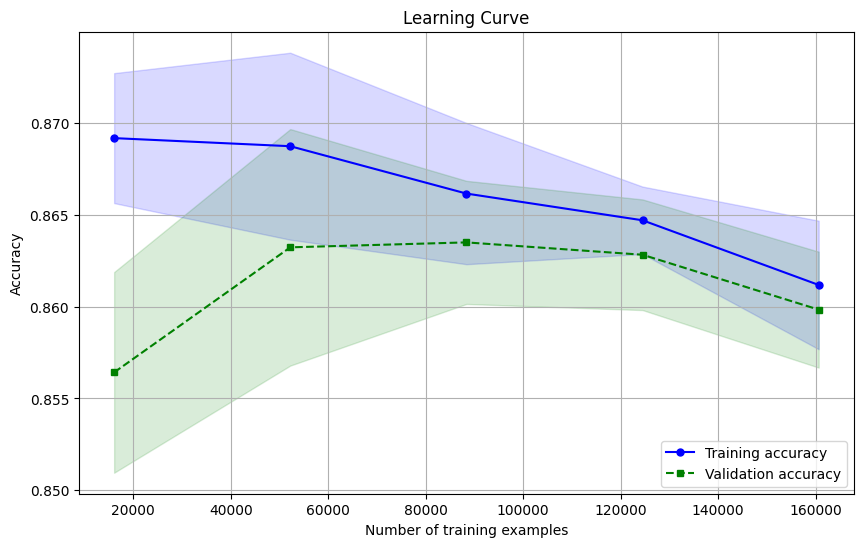

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

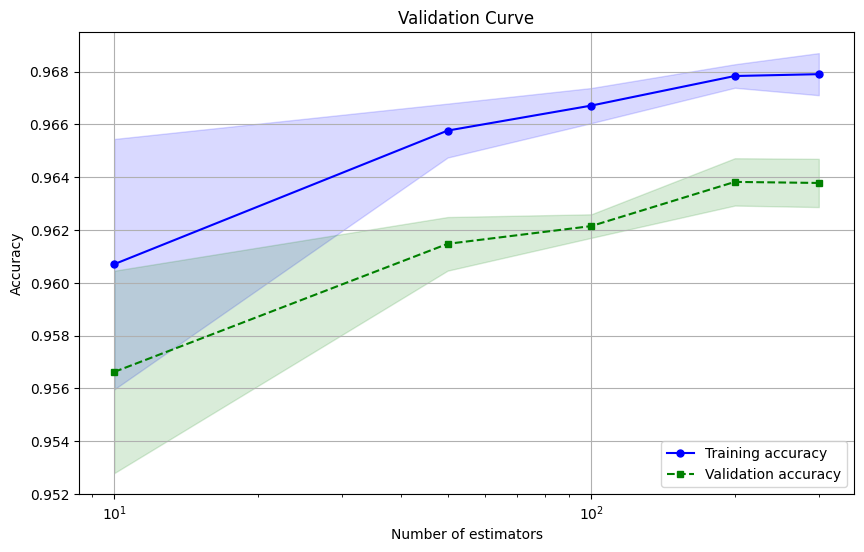

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}
best_model = RandomForestClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.96772748 0.96533519 0.96603247 0.96697878 0.96608228 0.96528539
 0.96493675 0.96548461 0.96643092 0.9636418 ]
Mean CV Accuracy: 0.9657935664534492
Test Accuracy: 0.9658289505139852


In [ ]:
X_train_selected

array([[-5.30476546, 15.1503859 ],
       [-4.58093019, 14.35290733],
       [-5.2209595 , 14.3799405 ],
       ...,
       [-2.36752376, 16.09654692],
       [-3.45028744, 14.92606752],
       [-5.40495728, 13.89334341]])

In [ ]:
X_train

,ACC_1,EDA,TEMP
292310,-1.160707,-5.304765,15.150386
32871,1.870883,-4.580930,14.352907
172477,-0.262458,-5.220960,14.379941
319972,-1.048426,-3.432924,14.934307
102708,-0.262458,-5.128771,14.109609
...,...,...,...
270694,0.036958,-5.264933,16.362043
45771,1.421759,-4.356536,13.798727
117334,-0.150177,-2.367524,16.096547
290345,-1.010999,-3.450287,14.926068


In [ ]:
X_test=X_test.drop(columns=['ACC_1'])

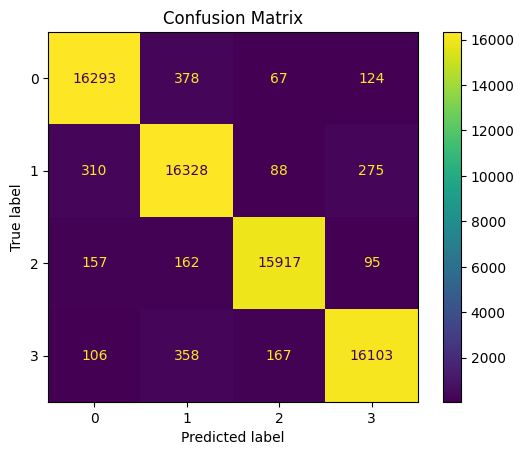

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
best_params = {'class_weight': None, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
best_model = DecisionTreeClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# úprava premenných
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.92146023 0.93834047 0.94048212 0.90238072 0.94421755 0.93151708
 0.94685726 0.94426736 0.93261281 0.9506923 ]
Mean CV Accuracy: 0.9352827898185472
Test Accuracy: 0.9115616782213722


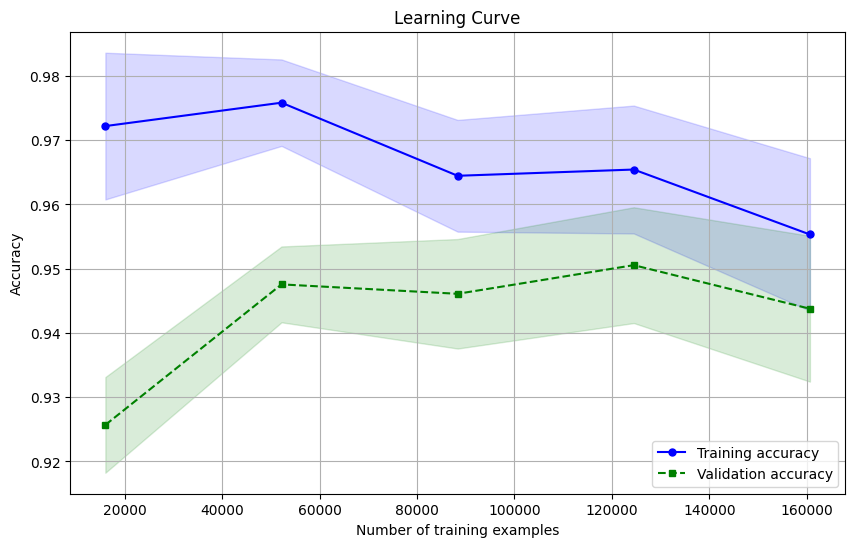

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Výpis ďalších metrík
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[16293   378    67   124]
 [  310 16328    88   275]
 [  157   162 15917    95]
 [  106   358   167 16103]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     16862
         1.0       0.95      0.96      0.95     17001
         2.0       0.98      0.97      0.98     16331
         3.0       0.97      0.96      0.97     16734

    accuracy                           0.97     66928
   macro avg       0.97      0.97      0.97     66928
weighted avg       0.97      0.97      0.97     66928



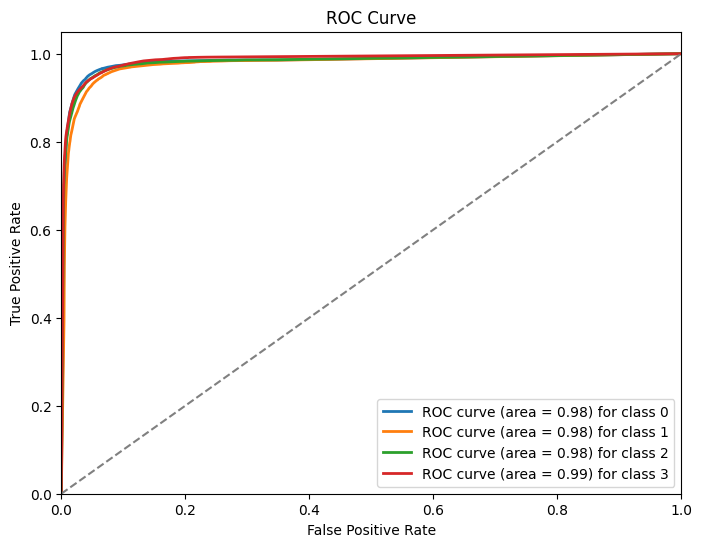

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


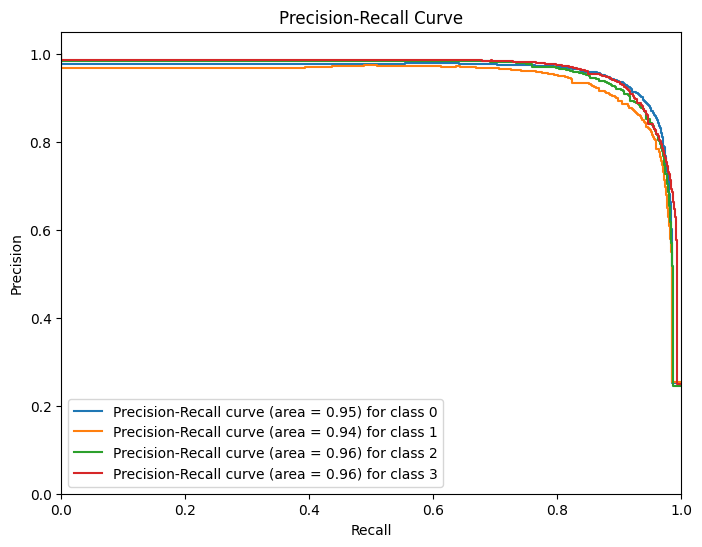

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_probs[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_probs[:, i])

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.step(recall[i], precision[i], where='post', label='Precision-Recall curve (area = %0.2f) for class %d' % (average_precision[i], i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

In [ ]:
# Feature importances
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.24619651 0.36686711 0.38693638]


FINAL

In [ ]:
import joblib
joblib.dump(best_model, 'Oversample_WESAD_All_4_labels.pkl')

['Oversample_WESAD_All_4_labels.pkl']

In [ ]:
X_test

,ACC_1,EDA,TEMP
166873,1.176146,-4.931567,15.081163
267594,-0.234150,-5.252695,15.391453
174909,-1.067565,-5.319699,15.232766
278040,1.887260,-5.243671,15.851608
65075,-1.855444,-2.140755,15.155504
...,...,...,...
48615,-0.508070,-5.254016,15.811058
159706,-0.957195,-5.223623,13.053675
214213,0.110178,-5.042972,16.095413
294002,0.256633,-5.338182,16.244864


In [ ]:
loaded_model = joblib.load('Oversample_WESAD_All_4_labels.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,predictions
0,3.0
1,1.0
2,0.0
3,2.0
4,0.0
...,...
66923,0.0
66924,3.0
66925,1.0
66926,2.0


In [ ]:
y_test

166873    3.0
267594    1.0
174909    0.0
278040    2.0
65075     0.0
         ... 
48615     0.0
159706    3.0
214213    1.0
294002    2.0
103804    1.0
Name: labels, Length: 66928, dtype: float64

In [ ]:
traget_df = y_test.reset_index(drop=True)

In [ ]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,3.0,3.0
1,1.0,1.0
2,0.0,0.0
3,2.0,2.0
4,0.0,0.0
...,...,...
66923,0.0,0.0
66924,3.0,3.0
66925,1.0,1.0
66926,2.0,2.0


In [ ]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 64679
Number of rows with different values: 2249
